# **Logistic Regression Using Scikit-Learn**

In this session we are going to study the following using scikit-learn:\
1 : Unregularised logistic regression \
 2:  Regularised logistic regression (L1 and L2)

# **Scikit-learn Steps**
1 : Set up feature matrix and target array \
2 : Choose (import) model class\
3 : Set model parameters via arguments to model constructor\
4 : Fit model to data\
5 : Apply model to new data \

Now Let’s apply this Steps to a data set.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix #for printing classification report
import seaborn as sns

Here we are considering **Iris** data set

In [ ]:
from sklearn.datasets import load_iris  #importing the load_iris class #https://scikit-learn.org/stable/datasets/toy_dataset.html
iris_data = load_iris() #loading the iris dataset in iris_data
print(iris_data['DESCR']) #checking out the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X = iris_data['data'][:,:2]
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

**Note :-** From the description, it is clear that *iris* dataset consists of essentially 3 classes: *Iris-Setosa*, *Iris-Versicolour*, *Iris-Virginica*. As logistic regression has been introduced as a binary classifier, we can alter the data into a binary classification problem based on finding whether a flower belongs to ***Iris-Virginica*** or not. In order to do that, we change the labels $\{0,1\}$ to $0$ and 2 to 1.

In [ ]:
y = np.where(iris_data['target'] == 2, 1, 0) #shorthand notation to change all labels other than 2 as 0 and 2 as 1
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


# **Data Splitting**

In [ ]:
# Split Dataset into train and test dataset using sklearn
from sklearn.model_selection import train_test_split
X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)
print(len(X_train_initial), len(X_test), len(y_train_initial), len(y_test))

120 30 120 30


# **Implement unregularised logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_initial, y_train_initial)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('coefficients:', logreg.coef_)
print('intercept:',logreg.intercept_)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

coefficients: [[ 2.21835657 -0.39193713]]
intercept: [-12.9907305]
Accuracy of logistic regression classifier on test set: 0.77


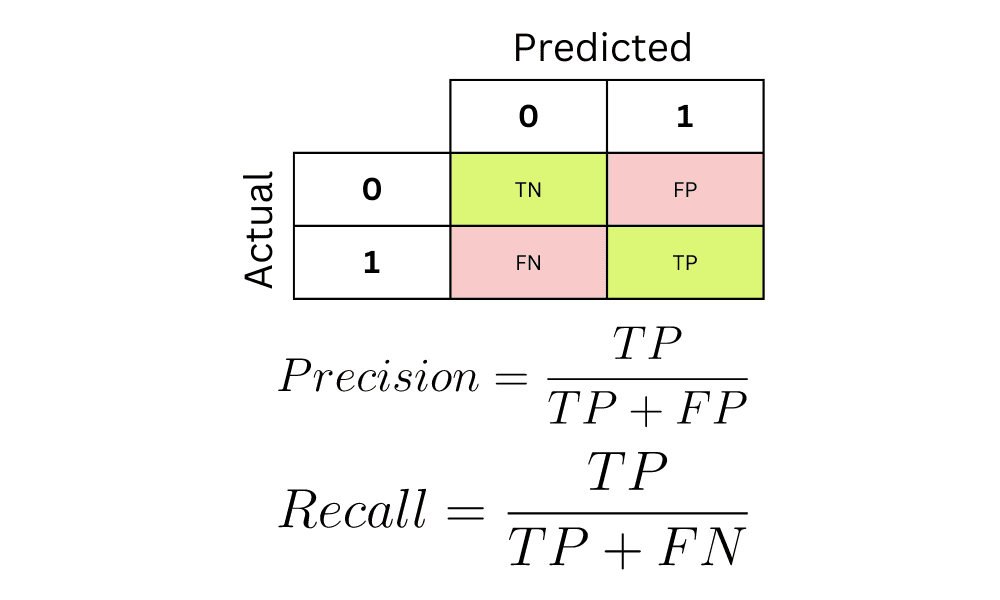

Image source [1]



In [ ]:
# Define class labels
class_labels = ['Not Iris-Virginica', 'Iris-Virginica']
# Print confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
                    Not Iris-Virginica  Iris-Virginica
Not Iris-Virginica                  17               1
Iris-Virginica                       6               6


In [ ]:
# help(confusion_matrix)

In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, logreg.predict(X_test),labels=[0,1]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.86      0.50      0.63        12

    accuracy                           0.77        30
   macro avg       0.80      0.72      0.73        30
weighted avg       0.79      0.77      0.75        30



# **Implement L2 regularized Logistic Regression**

In [ ]:
# import linear Regression with L2 Regularization from Sklearn
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

**- Pipelines encapsulate the entire workflow into a single object.**

In [ ]:

pipeline = make_pipeline(LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
                                              param_name='logisticregression__C', param_range=param_range) # c is amount of regularization
print('train scores:',train_scores)  #  validation curve is a plot of model performance versus a range of values for a hyperparameter
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')


train scores: [[0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.77777778 0.76851852 0.7962963  0.76851852 0.77777778 0.77777778
  0.77777778 0.80555556 0.78703704 0.78703704]
 [0.82407407 0.78703704 0.80555556 0.77777778 0.80555556 0.77777778
  0.80555556 0.83333333 0.78703704 0.80555556]
 [0.82407407 0.78703704 0.81481481 0.78703704 0.7962963  0.77777778
  0.78703704 0.83333333 0.7962963  0.80555556]
 [0.82407407 0.78703704 0.81481481 0.78703704 0.78703704 0.76851852
  0.78703704 0.83333333 0.80555556 0.81481481]
 [0.82407407 0.78703704 0.81481481 0.78703704 0.78703704 0.7685185

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.68333333 0.68333333 0.68333333 0.68333333 0.78240741 0.80092593
 0.80092593 0.80092593 0.80092593 0.80092593 0.80092593]
average val scores : [0.68333333 0.68333333 0.68333333 0.68333333 0.775      0.8
 0.8        0.8        0.8        0.8        0.8       ]


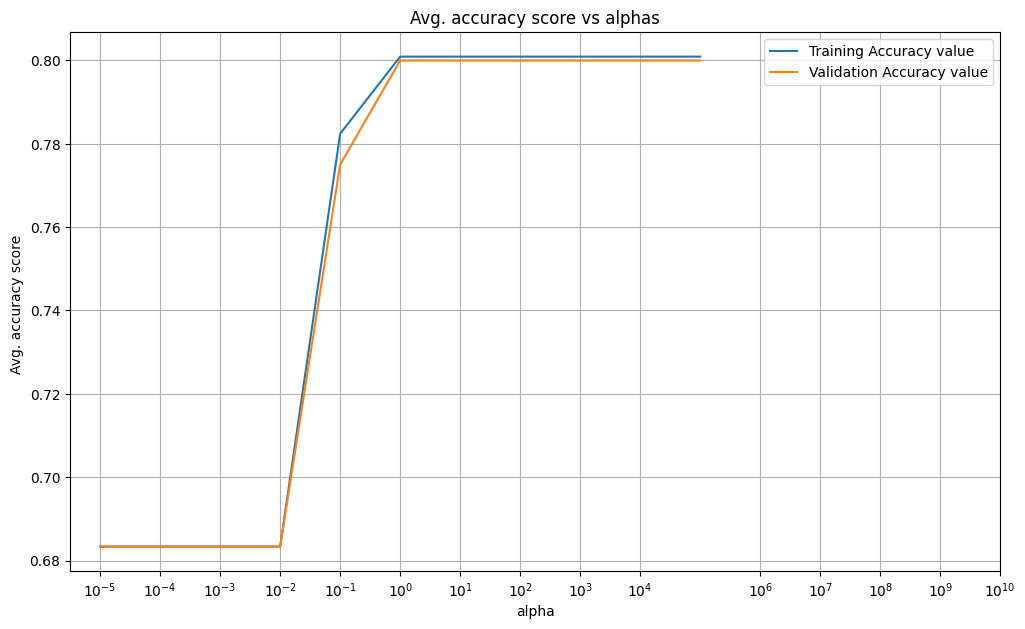

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training Accuracy value")
plt.plot(param_range, avg_val_scores,label = "Validation Accuracy value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy score vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()



# **Taking best alpha**

In [ ]:
#best alpha

best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 10 fold CV:',best_alpha)

best alpha from 10 fold CV: 1


# **Training on full data**

In [ ]:
clf = LogisticRegression(solver='lbfgs', penalty='l2', C = best_alpha, max_iter=10000, random_state=1)

clf.fit(X_train_initial, y_train_initial)

print('coefficients:', clf.coef_)
print('intercept:',clf.intercept_)


coefficients: [[ 2.21835657 -0.39193713]]
intercept: [-12.9907305]


# **Evaluating the performance on full train data and test data**

---



In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)

test_score = clf.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)


Train accuracy: 0.7916666666666666
Test accuracy: 0.7666666666666667


In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, clf.predict(X_test),labels=[0, 1]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.86      0.50      0.63        12

    accuracy                           0.77        30
   macro avg       0.80      0.72      0.73        30
weighted avg       0.79      0.77      0.75        30



# **Implement $\ell_1$ regularized Logistic Regression**

## L1 regulariser gives sparse solution compared to the L2 i.e. Ridge regularizer which gives non-sparse solutions.

- i.e. L2 regulariser reduces the weights to near 0, whereas L1 regulariser reduces the weight values to 0.

## Here saga is used as the solver :
---
- 'saga' stands for Stochastic Average Gradient Accelerated








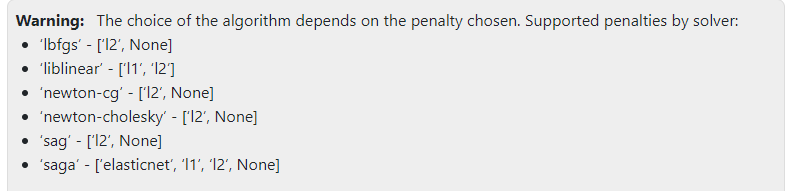

In [ ]:
pipeline = make_pipeline(LogisticRegression(solver='saga', penalty='l1', max_iter=10000, random_state=1))
#
# Get Training and test scores using validation curve method
# Pay attention to the parameter values range set as param_range
#
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e5]
train_scores, val_scores = validation_curve(estimator=pipeline,
                                             X=X_train_initial, y=y_train_initial,
                                             cv=10,
                                              param_name='logisticregression__C', param_range=param_range)
print('train scores:',train_scores)
print('val scores:',val_scores)

print('Printing more details of scores for each alpha:')
for i in range(len(param_range)):
  print('alpha:', param_range[i])
  print('train scores:', train_scores[i])
  print('val scores:', val_scores[i])
  print('**************************')

train scores: [[0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.68518519 0.68518519 0.68518519 0.68518519 0.68518519 0.68518519
  0.68518519 0.68518519 0.67592593 0.67592593]
 [0.76851852 0.78703704 0.7962963  0.78703704 0.7962963  0.78703704
  0.7962963  0.80555556 0.78703704 0.76851852]
 [0.82407407 0.78703704 0.82407407 0.7962963  0.80555556 0.78703704
  0.81481481 0.84259259 0.81481481 0.80555556]
 [0.82407407 0.78703704 0.80555556 0.76851852 0.78703704 0.76851852
  0.78703704 0.83333333 0.7962963  0.80555556]
 [0.82407407 0.78703704 0.80555556 0.76851852 0.78703704 0.76851852
  0.78703704 0.83333333 0.7962963  0.80555556]
 [0.82407407 0.78703704 0.80555556 0.77777778 0.78703704 0.7685185

In [ ]:
#print(train_scores.shape)
avg_train_scores = np.mean(train_scores,axis=1)
avg_val_scores = np.mean(val_scores,axis=1)
print('average train scores :',avg_train_scores)
print('average val scores :',avg_val_scores)

average train scores : [0.68333333 0.68333333 0.68333333 0.68333333 0.78796296 0.81018519
 0.7962963  0.7962963  0.79722222 0.79722222 0.79722222]
average val scores : [0.68333333 0.68333333 0.68333333 0.68333333 0.775      0.8
 0.8        0.8        0.8        0.8        0.8       ]


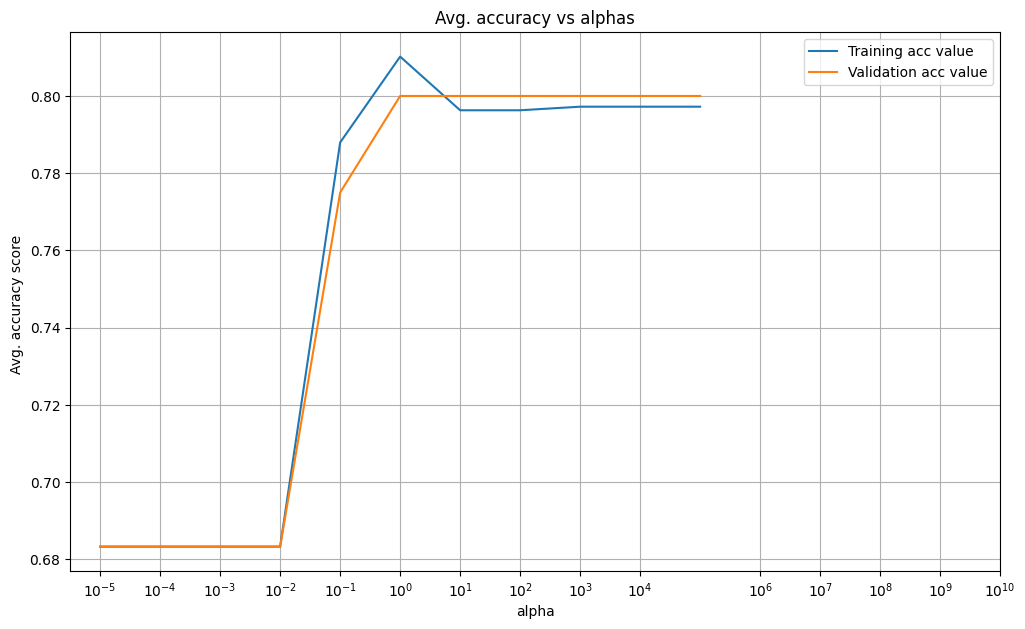

In [ ]:
plt.figure(figsize =(12,7))

plt.plot(param_range,avg_train_scores,label = "Training acc value")
plt.plot(param_range, avg_val_scores,label = "Validation acc value")
plt.xlabel('alpha')
plt.ylabel('Avg. accuracy score ')
plt.title("Avg. accuracy vs alphas")
plt.xscale('log')
plt.grid()
plt.legend()
plt.xticks( [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000,1e6,1e7,1e8,1e9,1e10])
plt.show()

# **Taking best alpha**

In [ ]:
#best alpha

best_alpha = param_range[np.argmax(avg_val_scores)]
print('best alpha from 10 fold CV:',best_alpha)

best alpha from 10 fold CV: 1


# **Training using best alpha on full train data**

In [ ]:
clf = LogisticRegression(solver='saga', penalty='l1', C=best_alpha, max_iter=10000, random_state=1)

clf.fit(X_train_initial, y_train_initial)


print('coefficients:', clf.coef_)
print('intercept:',clf.intercept_)


coefficients: [[ 2.33635814 -0.2678418 ]]
intercept: [-14.07904824]


# **Evaluating the performance on full train and test data**

---

In [ ]:
train_score = clf.score(X_train_initial, y_train_initial)

test_score = clf.score(X_test, y_test)

print('Train accuracy:',train_score)
print('Test accuracy:',test_score)


Train accuracy: 0.8083333333333333
Test accuracy: 0.7333333333333333


In [ ]:
print('Classification report on test data: ')
print(classification_report(y_test, clf.predict(X_test),labels=[0, 1]))

Classification report on test data: 
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.75      0.50      0.60        12

    accuracy                           0.73        30
   macro avg       0.74      0.69      0.70        30
weighted avg       0.74      0.73      0.72        30



- Macro average - Calculates metrics (such as precision or recall) independently for each class and then takes the average.

- Micro average - Calculates metrics by considering the total number of true positives, false positives, and false negatives across all classes

- Support is the number of actual occurrences of the class in the specified dataset

Reference \
- https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.kdnuggets.com%2F2022%2F11%2Fconfusion-matrix-precision-recall-explained.html&psig=AOvVaw1oryxvOjabklqOAKGQ9qqo&ust=1707598873576000&source=images&cd=vfe&opi=89978449&ved=0CBUQjhxqFwoTCLjNndmTn4QDFQAAAAAdAAAAABAP